In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression

####load dataset

In [21]:
#Load Dataset
dataset = pd.read_csv('C:\\Users\\victo\\Downloads\\kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


######data exploration 

In [22]:
dataset.describe()
#getting summary of the statistics 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [23]:
dataset.info()
# Understanding the type of each feature (numerical, categorical) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [24]:
import sweetviz as sv

report = sv.analyze(dataset)
report.show_html('Report.html')



                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\victo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\victo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

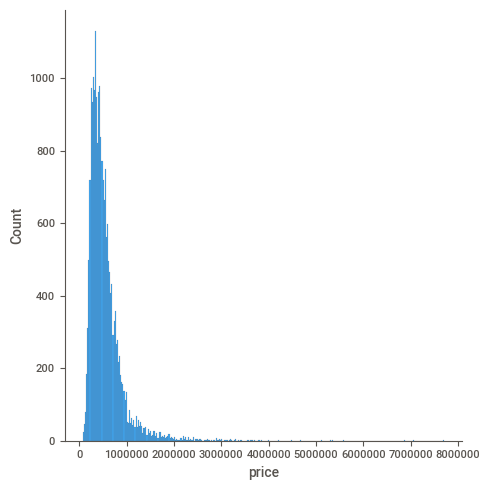

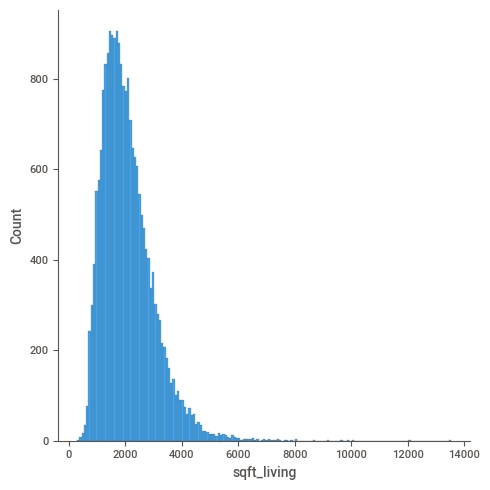

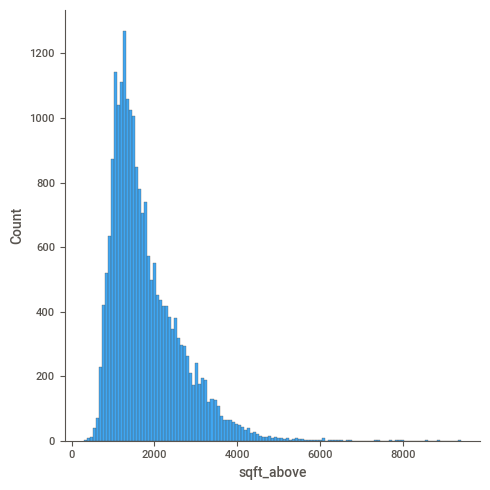

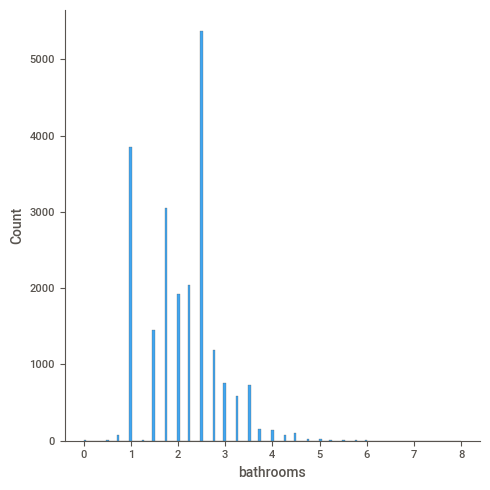

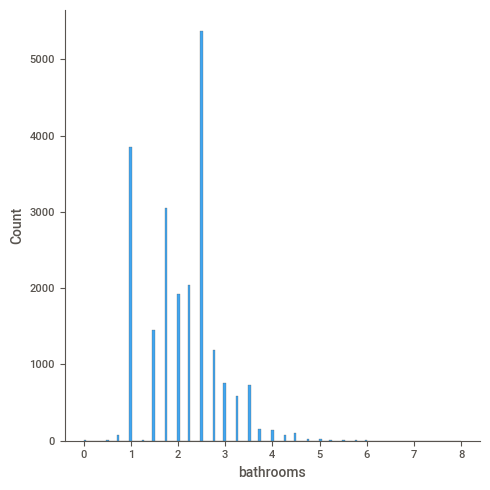

In [25]:
#dataset.hist(bins=50, figsize=(20,15))
sns.displot(data = dataset, x = 'price' )
sns.displot(data = dataset, x = 'sqft_living' )
sns.displot(data = dataset, x = 'sqft_above' )
sns.displot(data = dataset, x = 'bathrooms' )
sns.displot(data = dataset, x = 'bathrooms' )

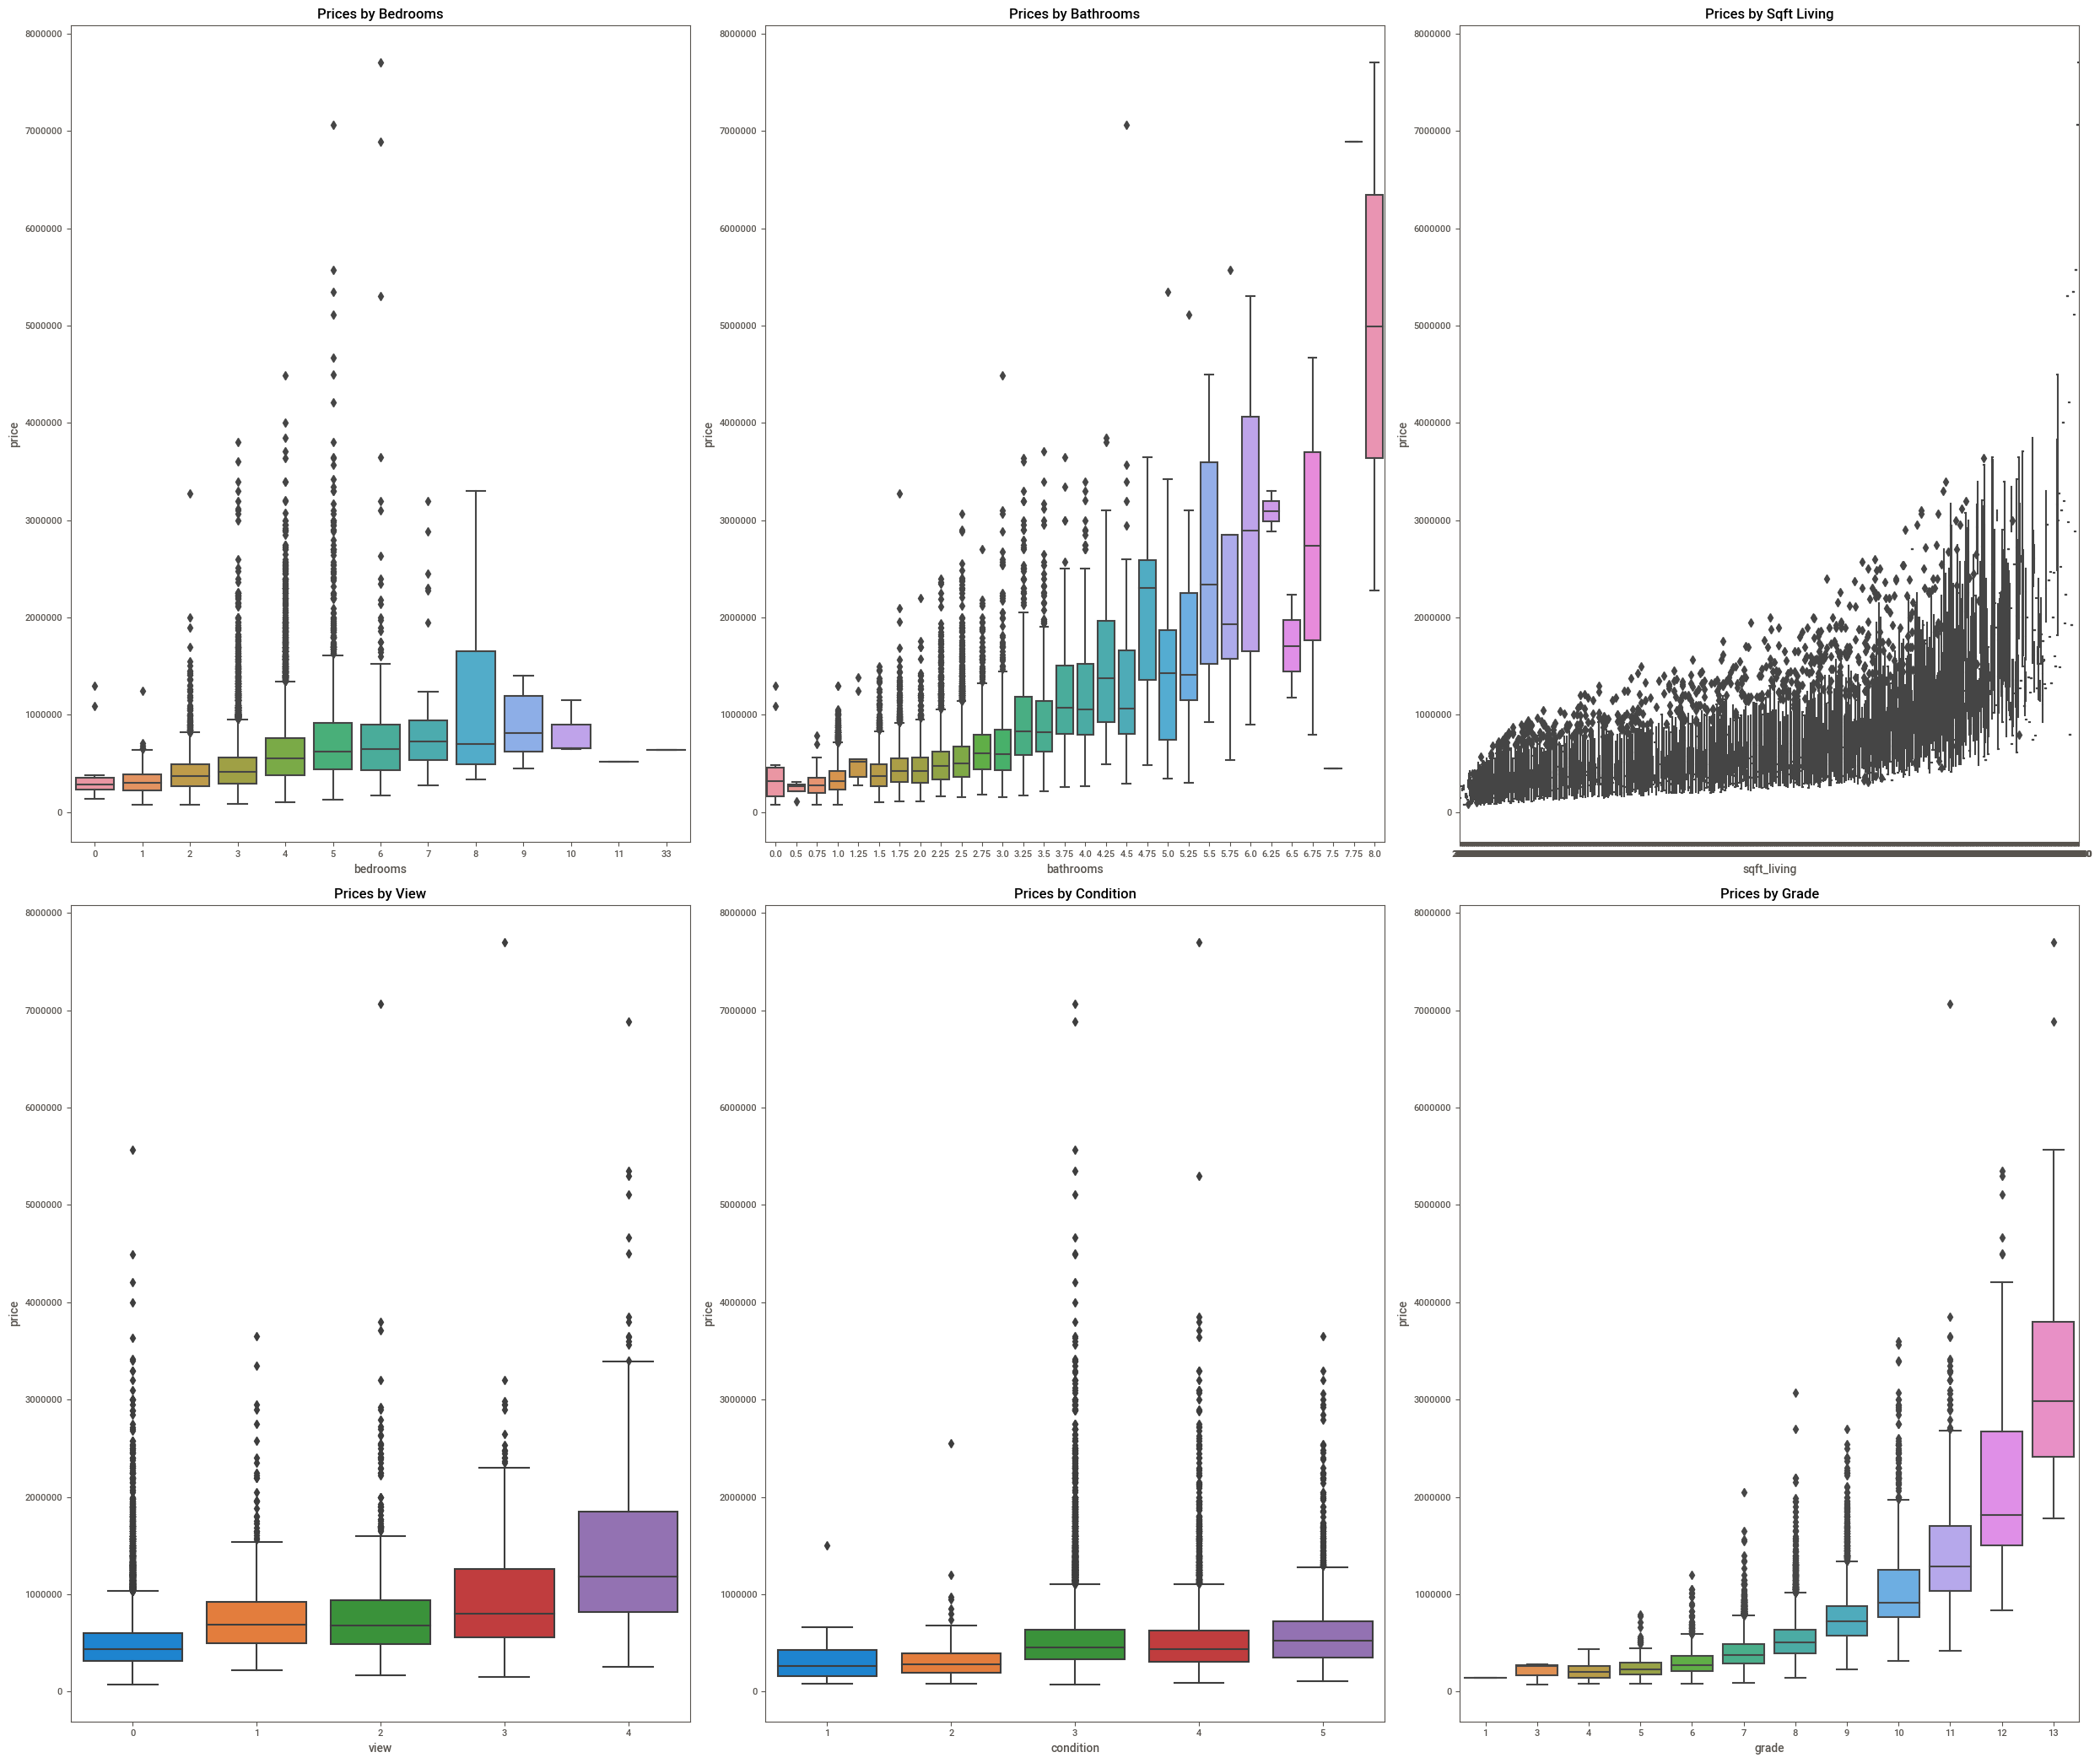

In [26]:
# Create boxplots
#Boxplot of Features

# Set up the matplotlib figure for a 3x3 grid of plots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 21))

# First row of plots
sns.boxplot(data=dataset, y='price', x='bedrooms', ax=ax[0, 0])
sns.boxplot(data=dataset, y='price', x='bathrooms', ax=ax[0, 1])
sns.boxplot(data=dataset, y='price', x='sqft_living', ax=ax[0, 2])

# Second row of plots
sns.boxplot(data=dataset, y='price', x='view', ax=ax[1, 0])
sns.boxplot(data=dataset, y='price', x='condition', ax=ax[1, 1])
sns.boxplot(data=dataset, y='price', x='grade', ax=ax[1, 2])



# Set titles for each subplot
ax[0, 0].set_title('Prices by Bedrooms')
ax[0, 1].set_title('Prices by Bathrooms')
ax[0, 2].set_title('Prices by Sqft Living')
ax[1, 0].set_title('Prices by View')
ax[1, 1].set_title('Prices by Condition')
ax[1, 2].set_title('Prices by Grade')


# Adjust layout for a cleaner look
plt.tight_layout()

# Show the plot
plt.show()



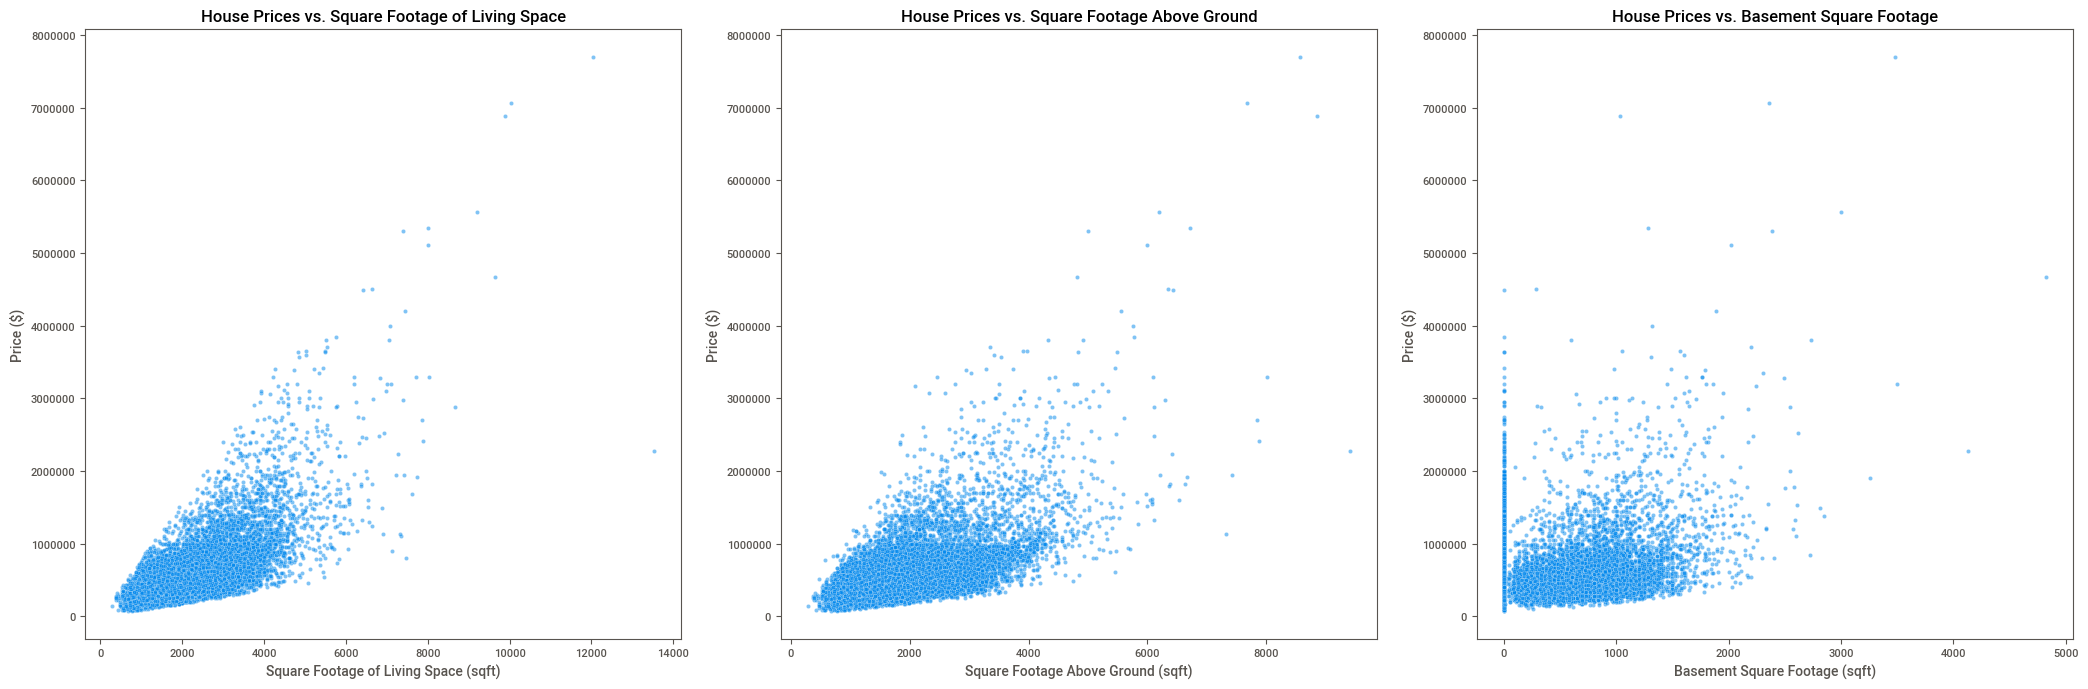

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the matplotlib figure with 3 subplots (one row, three columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))  # Adjusted for 3 plots in a row

# Scatter plot for Price vs. Square Footage of Living Space
sns.scatterplot(ax=axes[0], x='sqft_living', y='price', data=dataset, alpha=0.5)
axes[0].set_title('House Prices vs. Square Footage of Living Space')
axes[0].set_xlabel('Square Footage of Living Space (sqft)')
axes[0].set_ylabel('Price ($)')

# Scatter plot for Price vs. Square Footage Above Ground
sns.scatterplot(ax=axes[1], x='sqft_above', y='price', data=dataset, alpha=0.5)
axes[1].set_title('House Prices vs. Square Footage Above Ground')
axes[1].set_xlabel('Square Footage Above Ground (sqft)')
axes[1].set_ylabel('Price ($)')

# Scatter plot for Price vs. Basement Square Footage
sns.scatterplot(ax=axes[2], x='sqft_basement', y='price', data=dataset, alpha=0.5)
axes[2].set_title('House Prices vs. Basement Square Footage')
axes[2].set_xlabel('Basement Square Footage (sqft)')
axes[2].set_ylabel('Price ($)')

# Adjust layout for a cleaner look
plt.tight_layout()
plt.show()





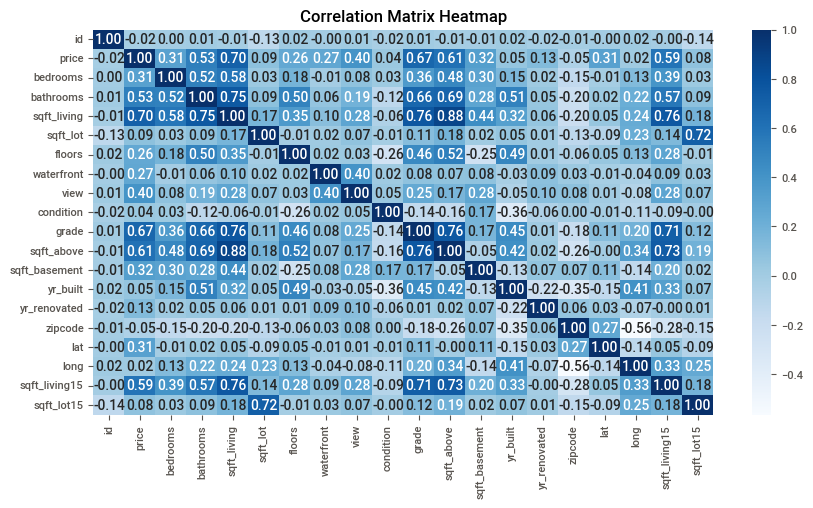

In [28]:

# Select only numeric columns for the correlation matrix
numeric_data = dataset.select_dtypes(include=[np.number])

# Calculate the correlation matrix of the numeric columns
corr_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
####data cleaning, feature selection, data tranformation and data split

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the seed for reproducibility
seed = 7

# Assuming 'dataset' is your DataFrame and has been previously loaded

# a) Data Cleaning
# For example, remove rows with missing values for the features of interest
dataset_cleaned = dataset.dropna(subset=['id', 'lat', 'long', 'zipcode'])



# b) Feature Selection
# Selecting features with the strongest correlations with 'price' based on the heatmap
features = ['sqft_living', 'grade', 'sqft_above', 'bathrooms']
X = dataset_cleaned[features]
y = dataset_cleaned['price']

# c) Data Transforms
# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets using the predefined seed
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)




In [ ]:
#### model initialization - linear, random forest, gradient descent, svm, decision tree.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model with training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

# Calculate and print the R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2): {:.2f}".format(r2))

# Print the coefficients and the intercept from the model
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)


Mean Squared Error (MSE): 61135989948.95
Mean Absolute Error (MAE): 159862.80
Root Mean Squared Error (RMSE): 247256.93
R-squared (R2): 0.54
Coefficients: [233710.45453364 134215.86653317 -65109.80693519 -28482.34769218]
Intercept: 539380.4238722393


In [31]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

# Define the seed for reproducibility
seed = 7

# Feature Selection
features = ['sqft_living', 'grade', 'sqft_above', 'bathrooms']
X = dataset[features]
y = dataset['price']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Create a pipeline that standardizes the data then applies SVR
svr_pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Train the SVR model
svr_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_pipeline.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Support Vector Regression Mean Squared Error (MSE): {:.2f}".format(mse))
print("Support Vector Regression Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Support Vector Regression Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Support Vector Regression R-squared (R2): {:.2f}".format(r2))


Support Vector Regression Mean Squared Error (MSE): 139232966152.80
Support Vector Regression Mean Absolute Error (MAE): 218808.22
Support Vector Regression Root Mean Squared Error (RMSE): 373139.34
Support Vector Regression R-squared (R2): -0.05


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the Decision Tree Regressor model
decision_tree_reg = DecisionTreeRegressor(random_state=seed)

# Train the model with the training data
decision_tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

# Calculate the R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2): {:.2f}".format(r2))


Mean Squared Error (MSE): 91506497176.48
Root Mean Squared Error (RMSE): 302500.41
Mean Absolute Error (MAE): 184188.54
R-squared (R2): 0.31


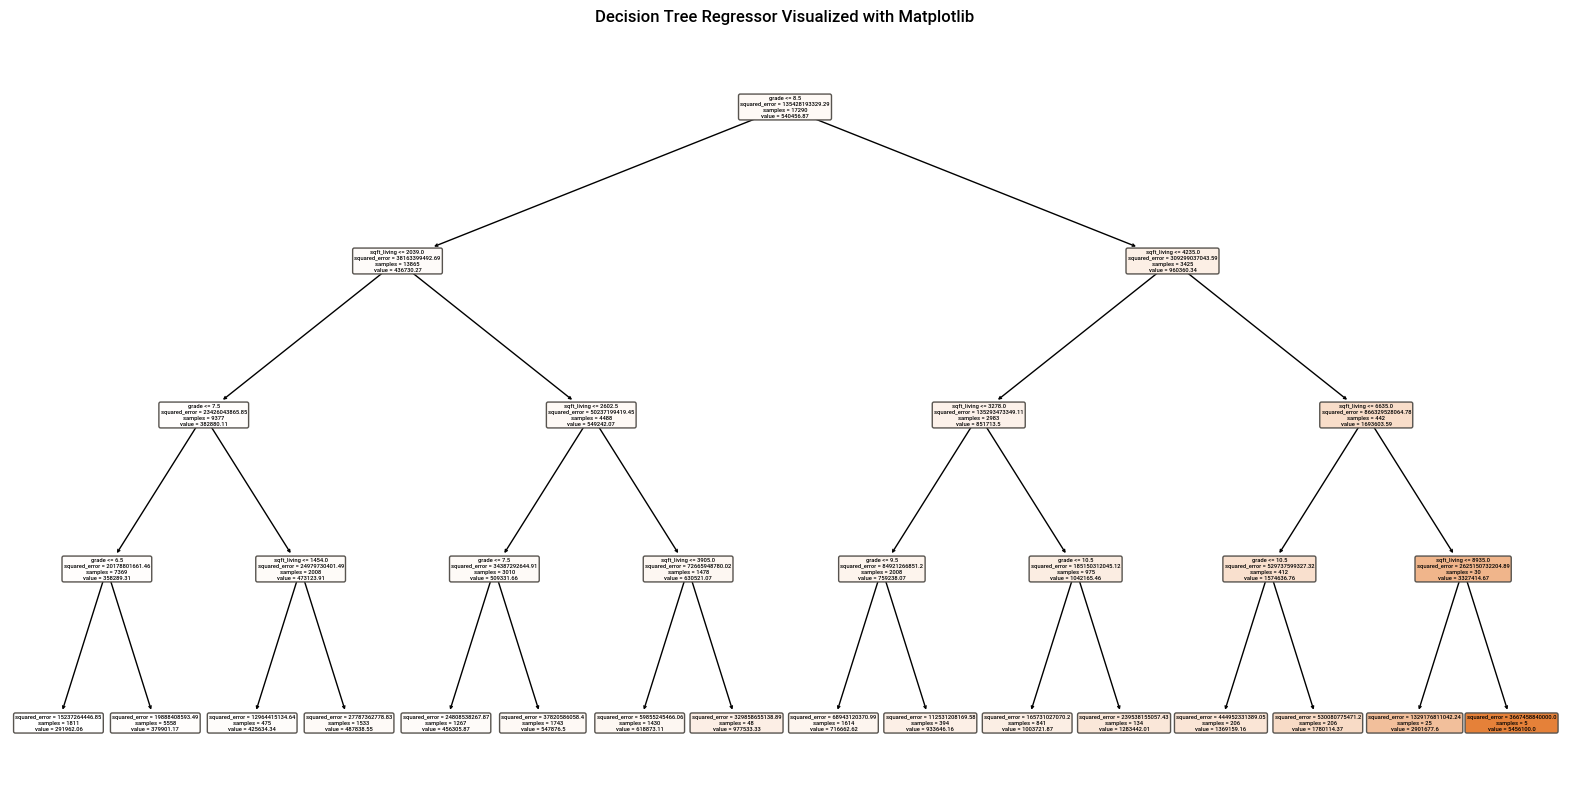

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Assuming 'X_train' and 'y_train' have been defined and are using only the selected features:
# 'sqft_living', 'grade', 'sqft_above', 'bathrooms'

decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=seed)  # Limit depth for better visualization
decision_tree_reg.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(decision_tree_reg, feature_names=['sqft_living', 'grade', 'sqft_above', 'bathrooms'], filled=True, precision=2, rounded=True)
plt.title("Decision Tree Regressor Visualized with Matplotlib")
plt.show() 


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the seed for reproducibility, assuming 'seed' is previously defined
# seed = 7 or any specific integer

# Initialize the Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=seed)

# Assuming 'X_train' and 'y_train' are already defined and loaded appropriately
# Train the model
random_forest_reg.fit(X_train, y_train)

# Assuming 'X_test' and 'y_test' are also defined
# Make predictions on the test set
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluate the model using mean squared error, RMSE, and MAE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the calculated metrics
print("Random Forest Regressor Mean Squared Error:", mse_rf)
print("Random Forest Regressor Root Mean Squared Error:", rmse_rf)
print("Random Forest Regressor Mean Absolute Error:", mae_rf)
print("Random Forest Regressor R-squared:", r2_rf)



Random Forest Regressor Mean Squared Error: 56431174102.090744
Random Forest Regressor Root Mean Squared Error: 237552.4659987573
Random Forest Regressor Mean Absolute Error: 155009.63269666937
Random Forest Regressor R-squared: 0.5730265066494846


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the Gradient Boosting Regressor
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=seed)

# Train the model
gradient_boosting_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gradient_boosting_reg.predict(X_test)

# Evaluate the model using mean squared error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regressor Mean Squared Error:", mse_gb)

# Calculate and print the root mean squared error
rmse_gb = np.sqrt(mse_gb)
print("Gradient Boosting Regressor Root Mean Squared Error:", rmse_gb)

# Calculate and print the mean absolute error
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print("Gradient Boosting Regressor Mean Absolute Error:", mae_gb)

# Calculate and print the R-squared value
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor R-squared:", r2_gb)


Gradient Boosting Regressor Mean Squared Error: 50246925589.17338
Gradient Boosting Regressor Root Mean Squared Error: 224158.26014040477
Gradient Boosting Regressor Mean Absolute Error: 147853.26607609345
Gradient Boosting Regressor R-squared: 0.6198181999523931


In [ ]:
#Ensembling method

In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# defining the 'seed' variable

seed = 7  


#  definiing  default values manually:
best_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

# Train the models
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=seed).fit(X_train, y_train)
gb = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=seed
).fit(X_train, y_train)

svr_pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_pipeline.fit(X_train, y_train)

# Predict using each model
predictions_lr = lr.predict(X_test)
predictions_rf = rf.predict(X_test)
predictions_gb = gb.predict(X_test)
predictions_svr = svr_pipeline.predict(X_test)

# Average the predictions
final_predictions = (predictions_lr + predictions_rf + predictions_gb + predictions_svr) / 4

# Calculate evaluation metrics
mse = mean_squared_error(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predictions)

# Print the calculated metrics
print("Ensemble Model Mean Squared Error (MSE):", mse)
print("Ensemble Model Mean Absolute Error (MAE):", mae)
print("Ensemble Model Root Mean Squared Error (RMSE):", rmse)
print("Ensemble Model R-squared (R2):", r2)


Ensemble Model Mean Squared Error (MSE): 56831569056.133224
Ensemble Model Mean Absolute Error (MAE): 148702.67681735603
Ensemble Model Root Mean Squared Error (RMSE): 238393.7269647279
Ensemble Model R-squared (R2): 0.5699970103654244


In [ ]:
#####gridsearchcv

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Model setups with their parameter grids
models = {
    'RF': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 4]
        }
    },
    'GB': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 4],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVR': {
        'model': Pipeline([('scaler', StandardScaler()), ('svr', SVR())]),
        'params': {
            'svr__C': [0.1, 1.0, 10.0],
            'svr__epsilon': [0.01, 0.1, 0.2]
        }
    },
    'LR': {
        'model': LinearRegression(),
        'params': {}  
    },
    'DT': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 4]
        }
    }
}

# Function to perform Grid Search and evaluate model
def evaluate_models(models, X_train, X_test, y_train, y_test):
    for name, setup in models.items():
        print(f"Evaluating {name}")
        grid_search = GridSearchCV(estimator=setup['model'], param_grid=setup['params'], cv=5, scoring='neg_mean_squared_error', verbose=1)
        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} Results - MSE: {mse}, RMSE: {rmse}, R2: {r2}")

#  X_train, X_test, y_train, y_test are already defined
evaluate_models(models, X_train, X_test, y_train, y_test)


Evaluating RF
Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\victo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\victo\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\victo\anaconda3\Lib\site-packag

RF Results - MSE: 50819638101.82566, RMSE: 225432.1141759214, R2: 0.6154849025134577
Evaluating GB
Fitting 5 folds for each of 108 candidates, totalling 540 fits
GB Results - MSE: 49454017523.52422, RMSE: 222382.592672008, R2: 0.6258175563734296
Evaluating SVR
Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVR Results - MSE: 134228688790.18774, RMSE: 366372.33627852926, R2: -0.015610486092690667
Evaluating LR
Fitting 5 folds for each of 1 candidates, totalling 5 fits
LR Results - MSE: 61135989948.94992, RMSE: 247256.9310432974, R2: 0.5374286001790272
Evaluating DT
Fitting 5 folds for each of 12 candidates, totalling 60 fits
DT Results - MSE: 59225092257.2102, RMSE: 243362.06002006598, R2: 0.5518869678429974


### Best model selected is gradient descent Boosting  

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# already loaded your dataset into X and y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Define and train the final model
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train, y_train)

from joblib import dump
# Save the model and the feature names
dump((final_model, X_train.columns.tolist()), 'final_model_with_feature_names.joblib')

from joblib import load
# Load the model and the feature names
final_model, feature_names = load('final_model_with_feature_names.joblib')

 # Reordering or filtering columns based on the loaded feature names
X_val = X_val[feature_names]  
y_val_pred = final_model.predict(X_val)


In [41]:
# Combine your training and validation sets
# This assumes you have them as separate dataframes or arrays already
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

# Re-scale the combined dataset (if scaling was part of your preprocessing)
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Train the final model on the full dataset
final_model.fit(X_full_scaled, y_full)

# Save your final model using joblib for later use
from joblib import dump
dump(final_model, 'final_model.joblib')

['final_model.joblib']